In [30]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotnine as p

In [2]:
df = pd.read_csv("../data/Student_Behaviour.csv")
df.columns = ["courses", "gender", "dept", "height", "weight", "ten_m", "twelve_m", "collegeM", "hobbies", "st", "time", "exp", "lk_deg", "prob", "sm_vg", "trav_time", "stress", "fin", "ptj"]
df.head()

,courses,gender,dept,height,weight,ten_m,twelve_m,collegeM,hobbies,st,time,exp,lk_deg,prob,sm_vg,trav_time,stress,fin,ptj
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [28]:
# Create dummies
df2 = df[["courses","gender", "height", "ten_m", "twelve_m", "collegeM", "st", "fin"]]
df2 = pd.get_dummies(df2)
df2.head()

,height,ten_m,twelve_m,collegeM,courses_No,courses_Yes,gender_Female,gender_Male,st_0 - 30 minute,st_1 - 2 Hour,st_2 - 3 hour,st_3 - 4 hour,st_30 - 60 minute,st_More Than 4 hour,fin_Awful,fin_Bad,fin_Fabulous,fin_good
0,100.0,79.0,65.0,80.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
1,90.0,70.0,80.0,70.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,159.0,69.5,61.0,55.0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
3,147.0,70.0,59.0,58.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,170.0,40.0,65.0,30.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


## El modelo de regresión

In [19]:
model = sm.OLS.from_formula('ten_m ~ courses_Yes', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ten_m   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     16.35
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           7.15e-05
Time:                        12:02:43   Log-Likelihood:                -928.66
No. Observations:                 235   AIC:                             1861.
Df Residuals:                     233   BIC:                             1868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      72.3289      1.388     52.121      0.000      69.595      75.063
courses_Yes     6.9777      1.725      4.044      0.000       3.578      10.377
==============================================================================
Omnibus:                       47.156   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.421
Skew:                          -1.048   Prob(JB):                     4.66e-19
Kurtosis:                       5.056   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
df2['ygorro1'] = model.predict(df2)
df2['ugorro1'] = model.resid
df2

,ten_m,twelve_m,collegeM,courses_No,courses_Yes,gender_Female,gender_Male,st_0 - 30 minute,st_1 - 2 Hour,st_2 - 3 hour,st_3 - 4 hour,st_30 - 60 minute,st_More Than 4 hour,fin_Awful,fin_Bad,fin_Fabulous,fin_good,ygorro1,ugorro1
0,79.0,65.0,80.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,72.328916,6.671084
1,70.0,80.0,70.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,72.328916,-2.328916
2,69.5,61.0,55.0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,79.306579,-9.806579
3,70.0,59.0,58.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,79.306579,-9.306579
4,40.0,65.0,30.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,72.328916,-32.328916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,72.0,67.0,65.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,79.306579,-7.306579
231,72.0,70.0,76.0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,79.306579,-7.306579
232,90.0,75.0,70.0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,79.306579,10.693421
233,85.0,74.0,75.0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,79.306579,5.693421


## Gráficos

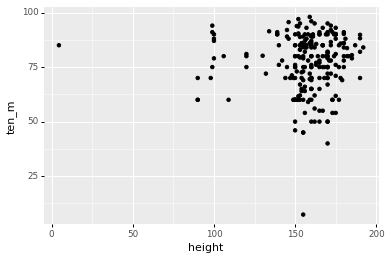

<ggplot: (311428075)>

In [32]:
p.ggplot(df2, p.aes(x = 'height', y = 'ten_m'))+\
    p.geom_point()